# MAT281 - Laboratorio N°06



## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [3]:
df['species'].astype('str') #la columna species la paso a tipo string
df['species'] = df['species'].str.lower().str.strip() #pongo la columna strings en minúscula y saco los espacios
df['species'].fillna("default",inplace = True) #reemplazo valores NaN de la columna species por "default"

In [4]:
df['species'].unique() #veo si mi columna species quedó bien.

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

In [5]:
#df.loc[df['sepalLength']=="default"] = 0

#reemplazos en la columna "sepalLength"
df.loc[df['sepalLength']==" nan"] = "default"  #" nan" por "default"
df.loc[df['sepalLength']=="5."] = '5.0' #"5." por 5.0
df.loc[df['sepalLength']=="6."] = '6.0'#"6." por 6.0
df.loc[df['sepalLength']=="7."] = '7.0' #etc...
df.loc[df['sepalLength']=="8."] = '8.0'
df.loc[df['sepalLength'].isnull(),'sepalLength'] = 0

#reemplazos en la columna "sepalWidth"
df.loc[df['sepalWidth']==" nan"] = "default"
df.loc[df['sepalWidth']=="2."] = '2.0'
df.loc[df['sepalWidth']=="3."] = '3.0'
df.loc[df['sepalWidth']=="4."] = '4.0'
df.loc[df['sepalWidth']=="5."] = '5.0'
df.loc[df['sepalWidth'].isnull(),'sepalWidth'] = 0

#reemplazos en la columna "petalLength"
df.loc[df['petalLength']==" nan"] = "default"
df.loc[df['petalLength']=="1."] = '1.0'
df.loc[df['petalLength']=="3."] = '3.0'
df.loc[df['petalLength']=="4."] = '4.0'
df.loc[df['petalLength']=="5."] = '5.0'
df.loc[df['petalLength']=="6."] = '6.0'
df.loc[df['petalLength']=="8."] = '8.0'
df.loc[df['petalLength'].isnull(),'petalLength'] = 0

#reemplazos en la columna "petalWidth"            
df.loc[df['petalWidth']==" nan"] = "default"
df.loc[df['petalWidth']=="1."] = '1.0'
df.loc[df['petalWidth']=="2."] = '2.0'
df.loc[df['petalWidth']=="3."] = '3.0'
df.loc[df['petalWidth'].isnull(),'petalWidth'] = 0



In [6]:
#df.dtypes

In [7]:
df['species'] = df['species'].astype(str)
df['sepalLength'] = df['sepalLength'].astype(float)
df['sepalWidth'] = df['sepalWidth'].astype(float)
df['petalLength'] = df['petalLength'].astype(float)
df['petalWidth'] = df['petalWidth'].astype(float)

In [8]:
df.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
species         object
dtype: object

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

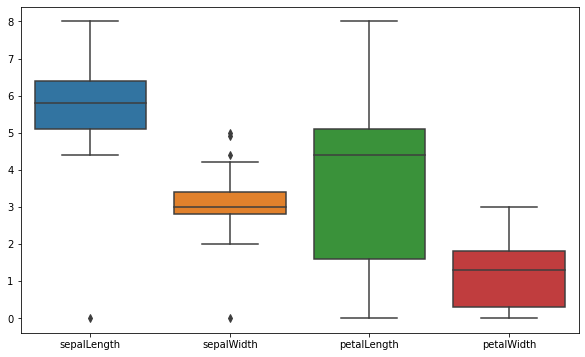

In [9]:
#comienzo reemplazando por 0 los valores NaN (en cada columna)
df['sepalLength'].fillna(0,inplace = True)
df['sepalWidth'].fillna(0,inplace = True)
df['petalLength'].fillna(0,inplace = True)
df['petalWidth'].fillna(0,inplace = True)

# Pre-format DataFrame
stats_df = df.drop(["species"], axis=1) #acá pongo todas las columnas que quiero sacar del gráfico
 
# New boxplot using stats_df
plt.figure(figsize=(10, 6))
sns.boxplot(data=df) #instancio boxplot y le doy el conjunto de datos (un boxplot para cada columna)
plt.show()


3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [10]:
lista = list()
largo = len(df)

#condiciones
for i in range(largo):
    
    if df['sepalLength'][i]<4.0 or df['sepalLength'][i]>7.0:
        lista.append("Fuera del rango")
        
    elif df['sepalWidth'][i]<2.0 or df['sepalWidth'][i]>4.5:
        lista.append("Fuera del rango")
        
    elif df['petalLength'][i]<1.0 or df['petalLength'][i]>7.0:
        lista.append("Fuera del rango")
        
    elif df['petalWidth'][i]<0.1 or df['petalWidth'][i]>2.5:
        lista.append("Fuera del rango")
        
    else:           
        lista.append("Dentro del rango")
        

#añado la lista a la nueva columna label        
df["label"]=lista

df

,sepalLength,sepalWidth,petalLength,petalWidth,species,label
0,4.4,3.2,1.3,3.0,setosa,Fuera del rango
1,7.2,3.6,6.1,2.5,virginica,Fuera del rango
2,6.3,3.3,6.0,2.5,virginica,Dentro del rango
3,6.7,3.3,5.7,2.5,virginica,Dentro del rango
4,6.3,3.4,5.6,2.4,virginica,Dentro del rango
...,...,...,...,...,...,...
145,5.3,3.0,1.1,0.1,setosa,Dentro del rango
146,4.8,3.0,1.4,0.1,setosa,Dentro del rango
147,4.9,3.1,1.5,0.1,setosa,Dentro del rango
148,4.9,3.6,1.4,0.1,setosa,Dentro del rango


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

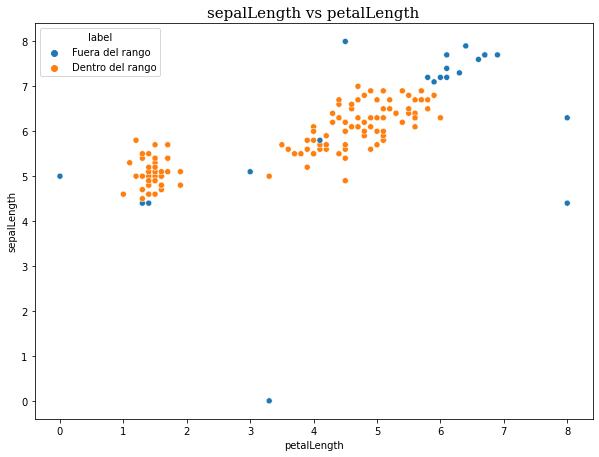

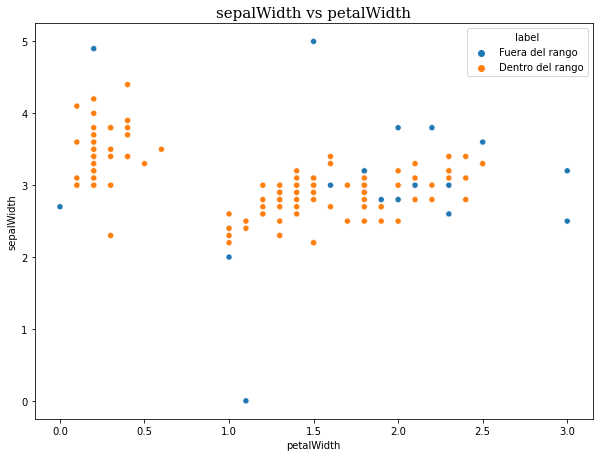

In [11]:
plt.figure(figsize=(10,16))

plt.subplot(2, 1, 1)

#plt.figure(figsize=(10, 6))

sns.scatterplot( #gráfico de dispersión - de ptos. 
    x='petalLength',
    y='sepalLength',
    hue='label',# color por label
    data=df,
    #palette=palette
)   
plt.title('sepalLength vs petalLength',font="Serif", size=15)
plt.show()

plt.figure(figsize=(10,16))
plt.subplot(2, 1, 2)


sns.scatterplot( #gráfico de dispersión - de ptos. 
    x='petalWidth',
    y='sepalWidth',
    hue='label',# color por label
    data=df,
    #palette=palette
)   

plt.title('sepalWidth vs petalWidth',font="Serif", size=15)
plt.show()

Se concluye que muy pocos datos están fuera de los rangos establecidos para las variables petalLength y sepalLength (gráfico 1) y lo mismo para las variables petalWidth y sepalWidth (gráfico 2). 
(En el gráfico los datos fuera de rango están representados por puntos azules). 

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

In [12]:
mask_df = df["label"] == "Dentro del rango" #filtro para que labels estén dentro del rango

mask2_df = ((df["species"] == "virginica") | (df["species"] == "setosa") | (df["species"] == "versicolor")) #filtro para que species no tome el valor "default" (y sólo tome los otros tres valores)


df_filtrado = df[mask_df & mask2_df] #junto ambos filtros en df_filtrado


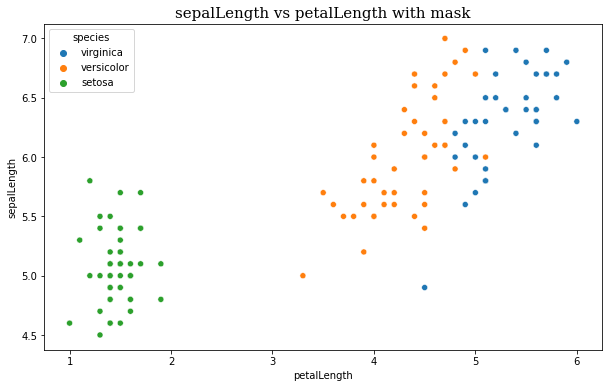

In [13]:
plt.figure(figsize=(10,6))


sns.scatterplot( #gráfico de dispersión - de ptos. 
    x='petalLength',
    y='sepalLength',
    hue='species',# color por species
    data=df_filtrado,
    #palette=palette
)   
plt.title('sepalLength vs petalLength with mask',font="Serif", size=15)
plt.show()